In [4]:
import pandas as pd
import os

import matplotlib as plt
import seaborn as sns
import numpy as np
from env import host, user, password

In [5]:
def get_connection(db, username=user, host=host, password=password):
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'

In [7]:
sql = """SELECT
  *
FROM properties_2017
LEFT JOIN predictions_2017 AS pe USING (parcelid)
LEFT JOIN architecturalstyletype AS arch USING (architecturalstyletypeid)
LEFT JOIN propertylandusetype USING (propertylandusetypeid)
LEFT JOIN airconditioningtype USING (airconditioningtypeid)
LEFT JOIN typeconstructiontype USING (typeconstructiontypeid)
LEFT JOIN storytype USING (storytypeid)
LEFT JOIN unique_properties USING (parcelid)
LEFT JOIN heatingorsystemtype USING (heatingorsystemtypeid)
WHERE propertylandusetype.propertylandusedesc = 'Single Family Residential'
AND pe.transactiondate LIKE '2017%%';
    
    """

df = pd.read_sql(sql, get_connection("zillow"));

##  2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)



In [8]:
df.columns

Index(['heatingorsystemtypeid', 'parcelid', 'storytypeid',
       'typeconstructiontypeid', 'airconditioningtypeid',
       'propertylandusetypeid', 'architecturalstyletypeid', 'id',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'latitude', 'longitude', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum',
       'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertyzoningdesc',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidneighborhood', 'regionidzip', 'roomcnt', 'threequarterbathnbr',
       'unitcnt', 'yardbuildingsqft17',

In [9]:
df.shape

(52441, 68)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   heatingorsystemtypeid         33935 non-null  float64
 1   parcelid                      52441 non-null  int64  
 2   storytypeid                   47 non-null     float64
 3   typeconstructiontypeid        76 non-null     float64
 4   airconditioningtypeid         13638 non-null  float64
 5   propertylandusetypeid         52441 non-null  float64
 6   architecturalstyletypeid      70 non-null     float64
 7   id                            52441 non-null  int64  
 8   basementsqft                  47 non-null     float64
 9   bathroomcnt                   52441 non-null  float64
 10  bedroomcnt                    52441 non-null  float64
 11  buildingclasstypeid           0 non-null      object 
 12  buildingqualitytypeid         33740 non-null  float64
 13  c

In [12]:
df.value_counts

<bound method DataFrame.value_counts of        heatingorsystemtypeid  parcelid  storytypeid  typeconstructiontypeid  \
0                        NaN  14297519          NaN                     NaN   
1                        NaN  17052889          NaN                     NaN   
2                        NaN  14186244          NaN                     NaN   
3                        2.0  12177905          NaN                     NaN   
4                        2.0  12095076          NaN                     NaN   
...                      ...       ...          ...                     ...   
52436                    2.0  12412492          NaN                     NaN   
52437                    2.0  11000655          NaN                     NaN   
52438                    NaN  17239384          NaN                     NaN   
52439                    2.0  12773139          NaN                     NaN   
52440                    2.0  12826780          NaN                     NaN   

       airc

In [15]:
df.describe()

,heatingorsystemtypeid,parcelid,storytypeid,typeconstructiontypeid,airconditioningtypeid,propertylandusetypeid,architecturalstyletypeid,id,basementsqft,bathroomcnt,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,id,logerror
count,33935.000000,5.244100e+04,47.0,76.000000,13638.000000,52441.0,70.00000,5.244100e+04,47.000000,52441.000000,...,81.0,5.235700e+04,5.244000e+04,52441.0,5.244000e+04,52437.000000,2079.000000,5.231800e+04,52441.000000,52441.000000
mean,3.966288,1.299912e+07,7.0,5.973684,2.438041,261.0,7.10000,1.497270e+06,678.978723,2.299403,...,1.0,1.965338e+05,5.296882e+05,2016.0,3.334655e+05,6453.511209,14.102453,6.050240e+13,38859.892946,0.018298
std,2.562506,3.411444e+06,0.0,0.229416,3.846176,0.0,2.66567,8.594393e+05,711.825226,1.022772,...,0.0,2.543401e+05,7.518946e+05,0.0,5.705278e+05,8755.568452,2.394972,1.859036e+12,22348.009638,0.177501
min,1.000000,1.071186e+07,7.0,4.000000,1.000000,261.0,2.00000,3.490000e+02,38.000000,0.000000,...,1.0,1.290000e+02,1.000000e+03,2016.0,1.610000e+02,49.180000,4.000000,6.037101e+13,0.000000,-4.655420
25%,2.000000,1.151022e+07,7.0,6.000000,1.000000,261.0,7.00000,7.579550e+05,263.500000,2.000000,...,1.0,7.707100e+04,1.937475e+05,2016.0,7.602075e+04,2656.220000,14.000000,6.037401e+13,19546.000000,-0.024639
50%,2.000000,1.257764e+07,7.0,6.000000,1.000000,261.0,7.00000,1.500810e+06,512.000000,2.000000,...,1.0,1.318110e+05,3.736120e+05,2016.0,2.180320e+05,4647.740000,15.000000,6.037620e+13,38927.000000,0.007011
75%,7.000000,1.412953e+07,7.0,6.000000,1.000000,261.0,7.00000,2.241534e+06,809.500000,3.000000,...,1.0,2.263340e+05,6.193012e+05,2016.0,4.086068e+05,7377.500000,15.000000,6.059042e+13,58092.000000,0.040692
max,24.000000,1.676878e+08,7.0,6.000000,13.000000,261.0,21.00000,2.982270e+06,3560.000000,18.000000,...,1.0,9.164901e+06,4.906124e+07,2016.0,4.895220e+07,586639.300000,99.000000,4.830301e+14,77612.000000,5.262999


  ## Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.


In [18]:
df.isnull().head()

,heatingorsystemtypeid,parcelid,storytypeid,typeconstructiontypeid,airconditioningtypeid,propertylandusetypeid,architecturalstyletypeid,id,basementsqft,bathroomcnt,...,censustractandblock,id,logerror,transactiondate,architecturalstyledesc,propertylandusedesc,airconditioningdesc,typeconstructiondesc,storydesc,heatingorsystemdesc
0,True,False,True,True,True,False,True,False,True,False,...,False,False,False,False,True,False,True,True,True,True
1,True,False,True,True,True,False,True,False,True,False,...,False,False,False,False,True,False,True,True,True,True
2,True,False,True,True,True,False,True,False,True,False,...,False,False,False,False,True,False,True,True,True,True
3,False,False,True,True,True,False,True,False,True,False,...,False,False,False,False,True,False,True,True,True,False
4,False,False,True,True,False,False,True,False,True,False,...,False,False,False,False,True,False,False,True,True,False


In [19]:
df.head()

,heatingorsystemtypeid,parcelid,storytypeid,typeconstructiontypeid,airconditioningtypeid,propertylandusetypeid,architecturalstyletypeid,id,basementsqft,bathroomcnt,...,censustractandblock,id,logerror,transactiondate,architecturalstyledesc,propertylandusedesc,airconditioningdesc,typeconstructiondesc,storydesc,heatingorsystemdesc
0,NaN,14297519,NaN,NaN,NaN,261.0,NaN,1727539,NaN,3.5,...,6.059063e+13,0,0.025595,2017-01-01,None,Single Family Residential,None,None,None,None
1,NaN,17052889,NaN,NaN,NaN,261.0,NaN,1387261,NaN,1.0,...,6.111001e+13,1,0.055619,2017-01-01,None,Single Family Residential,None,None,None,None
2,NaN,14186244,NaN,NaN,NaN,261.0,NaN,11677,NaN,2.0,...,6.059022e+13,2,0.005383,2017-01-01,None,Single Family Residential,None,None,None,None
3,2.0,12177905,NaN,NaN,NaN,261.0,NaN,2288172,NaN,3.0,...,6.037300e+13,3,-0.103410,2017-01-01,None,Single Family Residential,None,None,None,Central
4,2.0,12095076,NaN,NaN,1.0,261.0,NaN,781532,NaN,3.0,...,6.037461e+13,6,-0.001011,2017-01-01,None,Single Family Residential,Central,None,None,Central


In [20]:
df.isnull().sum()[:10]

heatingorsystemtypeid       18506
parcelid                        0
storytypeid                 52394
typeconstructiontypeid      52365
airconditioningtypeid       38803
propertylandusetypeid           0
architecturalstyletypeid    52371
id                              0
basementsqft                52394
bathroomcnt                     0
dtype: int64

In [21]:
df.shape[0]

52441

In [22]:
nulls_col = pd.DataFrame({'num_rows_missing': df.isnull().sum(), 
              'percent_rows_missing': (df.isnull().sum() / df.shape[0] * 100)})

nulls_col.sort_values(by='num_rows_missing', ascending=False).head(10)

,num_rows_missing,percent_rows_missing
finishedsquarefeet13,52441,100.000000
buildingclasstypeid,52441,100.000000
finishedsquarefeet15,52441,100.000000
storytypeid,52394,99.910375
storydesc,52394,99.910375
basementsqft,52394,99.910375
yardbuildingsqft26,52378,99.879865
architecturalstyletypeid,52371,99.866517
architecturalstyledesc,52371,99.866517
typeconstructiontypeid,52365,99.855075


In [31]:
nulls_by_columns(df)

,count,percent
heatingorsystemtypeid,18506,0.352892
parcelid,0,0.000000
storytypeid,52394,0.999104
typeconstructiontypeid,52365,0.998551
airconditioningtypeid,38803,0.739936
...,...,...
propertylandusedesc,0,0.000000
airconditioningdesc,38803,0.739936
typeconstructiondesc,52365,0.998551
storydesc,52394,0.999104


In [16]:
df.isnull().sum()

heatingorsystemtypeid     18506
parcelid                      0
storytypeid               52394
typeconstructiontypeid    52365
airconditioningtypeid     38803
                          ...  
propertylandusedesc           0
airconditioningdesc       38803
typeconstructiondesc      52365
storydesc                 52394
heatingorsystemdesc       18506
Length: 68, dtype: int64

In [17]:
(df.isnull().sum()/df.shape[0]*100)[:10]

heatingorsystemtypeid       35.289182
parcelid                     0.000000
storytypeid                 99.910375
typeconstructiontypeid      99.855075
airconditioningtypeid       73.993631
propertylandusetypeid        0.000000
architecturalstyletypeid    99.866517
id                           0.000000
basementsqft                99.910375
bathroomcnt                  0.000000
dtype: float64

In [ ]:
#prepare 

 ## Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer.

In [25]:
df.propertylandusedesc.info()

<class 'pandas.core.series.Series'>
RangeIndex: 52441 entries, 0 to 52440
Series name: propertylandusedesc
Non-Null Count  Dtype 
--------------  ----- 
52441 non-null  object
dtypes: object(1)
memory usage: 409.8+ KB


In [26]:
df.propertylandusedesc.head()

0    Single Family Residential
1    Single Family Residential
2    Single Family Residential
3    Single Family Residential
4    Single Family Residential
Name: propertylandusedesc, dtype: object

In [28]:
df.propertylandusedesc.unique()

array(['Single Family Residential'], dtype=object)

## Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

The input:
- A dataframe
- A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
- A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).

The output:
- The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.

hint:
- Look up the dropna documentation.
- You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.

In [29]:
def nulls_by_columns(df):
    return pd.concat([
        df.isna().sum().rename('count'),
        df.isna().mean().rename('percent')
    ], axis=1)

In [32]:
cols_to_remove = ['heatingorsystemtypeid','parcelid','storytypeid','typeconstructiontypeid','airconditioningtypeid','propertylandusetypeid','architecturalstyletypeid','id','buildingclasstypeid','buildingqualitytypeid','decktypeid','pooltypeid10','pooltypeid2','pooltypeid7','taxamount','taxdelinquencyflag','taxdelinquencyyear','id']


def remove_columns(df, cols_to_remove):
    df = df.drop(columns=cols_to_remove)
    return df

In [33]:
remove_columns(df, cols_to_remove)

,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,...,landtaxvaluedollarcnt,censustractandblock,logerror,transactiondate,architecturalstyledesc,propertylandusedesc,airconditioningdesc,typeconstructiondesc,storydesc,heatingorsystemdesc
0,NaN,3.5,4.0,3.5,NaN,3100.0,3100.0,None,None,NaN,...,537569.0,6.059063e+13,0.025595,2017-01-01,None,Single Family Residential,None,None,None,None
1,NaN,1.0,2.0,1.0,1465.0,1465.0,1465.0,None,None,1465.0,...,376000.0,6.111001e+13,0.055619,2017-01-01,None,Single Family Residential,None,None,None,None
2,NaN,2.0,3.0,2.0,NaN,1243.0,1243.0,None,None,NaN,...,479489.0,6.059022e+13,0.005383,2017-01-01,None,Single Family Residential,None,None,None,None
3,NaN,3.0,4.0,3.0,NaN,2376.0,2376.0,None,None,NaN,...,36225.0,6.037300e+13,-0.103410,2017-01-01,None,Single Family Residential,None,None,None,Central
4,NaN,3.0,4.0,3.0,NaN,2962.0,2962.0,None,None,NaN,...,496619.0,6.037461e+13,-0.001011,2017-01-01,None,Single Family Residential,Central,None,None,Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52436,NaN,2.0,4.0,2.0,NaN,1633.0,1633.0,None,None,NaN,...,221068.0,6.037555e+13,0.001082,2017-09-19,None,Single Family Residential,None,None,None,Central
52437,NaN,2.0,2.0,2.0,NaN,1286.0,1286.0,None,None,NaN,...,283704.0,6.037101e+13,0.020615,2017-09-20,None,Single Family Residential,None,None,None,Central
52438,NaN,2.0,4.0,2.0,1612.0,1612.0,1612.0,None,None,1612.0,...,16522.0,6.111008e+13,0.013209,2017-09-21,None,Single Family Residential,None,None,None,None
52439,NaN,1.0,3.0,1.0,NaN,1032.0,1032.0,None,None,NaN,...,16749.0,6.037434e+13,0.037129,2017-09-21,None,Single Family Residential,Central,None,None,Central


In [34]:
def handle_missing_values(df, prop_required_columns=0.6, prop_required_row=0.75):
    threshold = int(round(prop_required_columns * len(df.index), 0))
    df = df.dropna(axis=1, thresh=threshold) #1, or ‘columns’ : Drop columns which contain missing value
    threshold = int(round(prop_required_row * len(df.columns), 0))
    df = df.dropna(axis=0, thresh=threshold) #0, or ‘index’ : Drop rows which contain missing values.
    return df

In [35]:
handle_missing_values(df, prop_required_columns=0.6, prop_required_row=0.75)

,heatingorsystemtypeid,parcelid,propertylandusetypeid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id,logerror,transactiondate,propertylandusedesc,heatingorsystemdesc
0,NaN,14297519,261.0,1727539,3.5,4.0,NaN,3.5,3100.0,3100.0,...,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0,0.025595,2017-01-01,Single Family Residential,None
1,NaN,17052889,261.0,1387261,1.0,2.0,NaN,1.0,1465.0,1465.0,...,464000.0,2016.0,376000.0,5672.48,6.111001e+13,1,0.055619,2017-01-01,Single Family Residential,None
2,NaN,14186244,261.0,11677,2.0,3.0,NaN,2.0,1243.0,1243.0,...,564778.0,2016.0,479489.0,6488.30,6.059022e+13,2,0.005383,2017-01-01,Single Family Residential,None
3,2.0,12177905,261.0,2288172,3.0,4.0,8.0,3.0,2376.0,2376.0,...,145143.0,2016.0,36225.0,1777.51,6.037300e+13,3,-0.103410,2017-01-01,Single Family Residential,Central
4,2.0,12095076,261.0,781532,3.0,4.0,9.0,3.0,2962.0,2962.0,...,773303.0,2016.0,496619.0,9516.26,6.037461e+13,6,-0.001011,2017-01-01,Single Family Residential,Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52436,2.0,12412492,261.0,2274245,2.0,4.0,6.0,2.0,1633.0,1633.0,...,346534.0,2016.0,221068.0,4175.08,6.037555e+13,77607,0.001082,2017-09-19,Single Family Residential,Central
52437,2.0,11000655,261.0,673515,2.0,2.0,6.0,2.0,1286.0,1286.0,...,354621.0,2016.0,283704.0,4478.43,6.037101e+13,77609,0.020615,2017-09-20,Single Family Residential,Central
52438,NaN,17239384,261.0,2968375,2.0,4.0,NaN,2.0,1612.0,1612.0,...,67205.0,2016.0,16522.0,1107.48,6.111008e+13,77610,0.013209,2017-09-21,Single Family Residential,None
52439,2.0,12773139,261.0,1843709,1.0,3.0,4.0,1.0,1032.0,1032.0,...,49546.0,2016.0,16749.0,876.43,6.037434e+13,77611,0.037129,2017-09-21,Single Family Residential,Central


## Mall Customers

In [37]:
sql = """SELECT * FROM customers;"""

df2 = pd.read_sql(sql, get_connection("mall_customers"));

In [38]:
df2.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Summarize data (include distributions and descriptive statistics).

In [39]:
df2.describe()

,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Detect outliers using IQR.

In [40]:
def get_upper_outliers(s, k=1.5):
    '''
    Given a series and a cutoff value, k, returns the upper outliers for the
    series.

    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the upper bound the observation is.
    '''
    q1, q3 = s.quantile([.25, 0.75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))

In [41]:
def add_upper_outlier_columns(df, k=1.5):
    '''
    Add a column with the suffix _outliers for all the numeric columns
    in the given dataframe.
    '''
    for col in df.select_dtypes('number'):
        df[col + '_outliers_upper'] = get_upper_outliers(df[col], k)
    return df

In [43]:
df3 = add_upper_outlier_columns(df2)


In [45]:
df3.head()


,customer_id,gender,age,annual_income,spending_score,customer_id_outliers_upper,age_outliers_upper,annual_income_outliers_upper,spending_score_outliers_upper,customer_id_outliers_upper_outliers_upper,age_outliers_upper_outliers_upper,annual_income_outliers_upper_outliers_upper,spending_score_outliers_upper_outliers_upper
0,1,Male,19,15,39,0,0,0.0,0,0.0,0.0,0.0,0.0
1,2,Male,21,15,81,0,0,0.0,0,0.0,0.0,0.0,0.0
2,3,Female,20,16,6,0,0,0.0,0,0.0,0.0,0.0,0.0
3,4,Female,23,16,77,0,0,0.0,0,0.0,0.0,0.0,0.0
4,5,Female,31,17,40,0,0,0.0,0,0.0,0.0,0.0,0.0


In [46]:
outlier_cols = [col for col in df3.columns if col.endswith('_outliers_upper')]
for col in outlier_cols:
    print(col, ': ')
    subset = df[col][df[col] > 0]
    print(f'Number of Observations Above Upper Bound: {subset.count()}', '\n')
    print(subset.describe())
    print('------', '\n')

customer_id_outliers_upper : 
Number of Observations Above Upper Bound: 0 

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: customer_id_outliers_upper, dtype: float64
------ 

age_outliers_upper : 
Number of Observations Above Upper Bound: 0 

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: age_outliers_upper, dtype: float64
------ 

annual_income_outliers_upper : 
Number of Observations Above Upper Bound: 2 

count    2.00
mean     4.25
std      0.00
min      4.25
25%      4.25
50%      4.25
75%      4.25
max      4.25
Name: annual_income_outliers_upper, dtype: float64
------ 

spending_score_outliers_upper : 
Number of Observations Above Upper Bound: 0 

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: spending_score_outliers_upper, dtype: float64
------ 

customer_id_outliers_upper_outliers_upper : 
N

Split data into train, validate, and test.

In [47]:
from sklearn.model_selection import train_test_split

def split_data(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames; stratify on taxvaluedollarcnt.
    return train, validate, test DataFrames.
    '''


    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123)
    return train, validate, test

train, validate, test = split_data(df3)

In [48]:
train.shape, validate.shape, test.shape

((112, 13), (48, 13), (40, 13))

Encode categorical columns using a one hot encoder (pd.get_dummies).

In [49]:
dummy_df = pd.get_dummies(train['gender'],dummy_na=False, drop_first = True)
#append to add encoded col to df
train = pd.concat([train, dummy_df], axis=1)

In [50]:
train.head()

,customer_id,gender,age,annual_income,spending_score,customer_id_outliers_upper,age_outliers_upper,annual_income_outliers_upper,spending_score_outliers_upper,customer_id_outliers_upper_outliers_upper,age_outliers_upper_outliers_upper,annual_income_outliers_upper_outliers_upper,spending_score_outliers_upper_outliers_upper,Male
123,124,Male,39,69,91,0,0,0.0,0,0.0,0.0,0.0,0.0,1
76,77,Female,45,54,53,0,0,0.0,0,0.0,0.0,0.0,0.0,0
171,172,Male,28,87,75,0,0,0.0,0,0.0,0.0,0.0,0.0,1
10,11,Male,67,19,14,0,0,0.0,0,0.0,0.0,0.0,0.0,1
35,36,Female,21,33,81,0,0,0.0,0,0.0,0.0,0.0,0.0,0


Handles missing values.

In [51]:
train.isnull().sum()

customer_id                                     0
gender                                          0
age                                             0
annual_income                                   0
spending_score                                  0
customer_id_outliers_upper                      0
age_outliers_upper                              0
annual_income_outliers_upper                    0
spending_score_outliers_upper                   0
customer_id_outliers_upper_outliers_upper       0
age_outliers_upper_outliers_upper               0
annual_income_outliers_upper_outliers_upper     0
spending_score_outliers_upper_outliers_upper    0
Male                                            0
dtype: int64

In [54]:
cols_to_remove = ['customer_id_outliers_upper','age_outliers_upper','annual_income_outliers_upper','spending_score_outliers_upper','customer_id_outliers_upper_outliers_upper', 'age_outliers_upper_outliers_upper','annual_income_outliers_upper_outliers_upper', 'spending_score_outliers_upper_outliers_upper']
train.drop(columns=cols_to_remove)

,customer_id,gender,age,annual_income,spending_score,Male
123,124,Male,39,69,91,1
76,77,Female,45,54,53,0
171,172,Male,28,87,75,1
10,11,Male,67,19,14,1
35,36,Female,21,33,81,0
...,...,...,...,...,...,...
175,176,Female,30,88,86,0
101,102,Female,49,62,48,0
148,149,Female,34,78,22,0
99,100,Male,20,61,49,1


Scaling

Text(0.5, 1.0, 'Scaled')

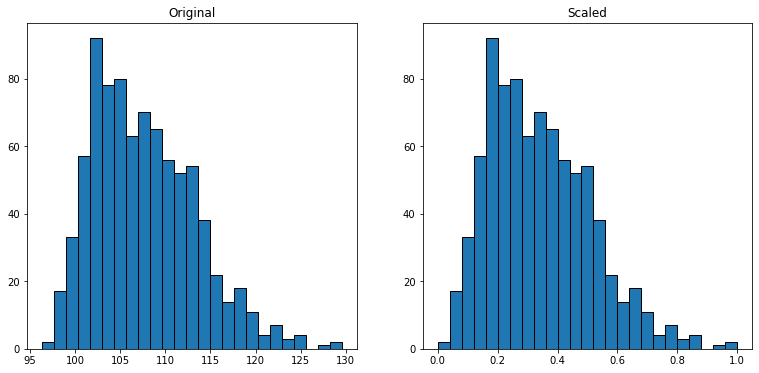

In [55]:
import sklearn.preprocessing
from scipy import stats
import matplotlib.pyplot as plt


x = stats.skewnorm(7).rvs(1500) * 10 + 100
x = x.reshape(-1, 1)
#I first again split, to have a set of data that is not scaled and one
#that is scaled:
x_train_and_validate, x_test = train_test_split(x, random_state=123)
x_train, x_validate = train_test_split(x_train_and_validate)

scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')